# Pre Modeling

### Notebook Contents

### Feature Importance

1. Feature-importance
2. Univariate-Selection
3. Recursive-Feature-Elimination
4. Removing-Highly-Corelated-Variables
4. Boruta
6. Variance-Inflation-Factor-(VIF)
7. Principal-Component-Analysis-(PCA)
8. Linear-Discriminant-Analysis-(LDA)
9. Feature-Importance-using-RF

## Load the requred Libraries and Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Feature importance 
The performance of machine learning model is directly proportional to the data features used to train it. The performance of ML model will be affected negatively if the data features provided to it are irrelevant. On the other hand, **use of relevant data features can increase the accuracy of your ML model** especially linear and logistic regression.

Performing feature selection before data modeling will reduce the overfitting.<br>
Performing feature selection before data modeling will increases the accuracy of ML model.<br>
Performing feature selection before data modeling will reduce the training time.<br>

### Univariate Selection
This feature selection technique is very useful in **selecting relevent features, with the help of statistical testing**, having strongest relationship with the prediction variables. We can implement univariate feature selection technique with the help of **SelectKBest()** class of scikit-learn Python library.<br>
There are **two parameter for SelectKBest()**: <br>
1. First is the statistical testing function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores. Default is f_classif (see below “See also”). The default function only works with classification tasks. Other fuctions available:<br>

|Fuction|Use|
|-------|---|
|f_classif|ANOVA F-value between label/feature for classification tasks|
|mutual_info_classif|Mutual information for a discrete target|
|chi2|Chi-squared stats of non-negative features for classification tasks|
|f_regression|F-value between label/feature for regression tasks|
|mutual_info_regression|Mutual information for a continuous target|
|SelectPercentile|Select features based on percentile of the highest scores|
|SelectFpr|Select features based on a false positive rate test|
|SelectFdr|Select features based on an estimated false discovery rate|
|SelectFwe|Select features based on family-wise error rate|
|GenericUnivariateSelect|Univariate feature selector with configurable mode|

2. Number of top features to select. The “all” option bypasses selection, for use in a parameter search.

In the example below, we will use Pima Indians Diabetes dataset to select 4 of the attributes having best features with the help of chi-square statistical test. Please download the dataset from the link below: <br>
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv


Feature 0: 68.871586
Feature 1: 939.238257
Feature 2: 28.607335
Feature 3: 29.363554
Feature 4: 1696.049681
Feature 5: 95.497408
Feature 6: 5.133612
Feature 7: 105.525936


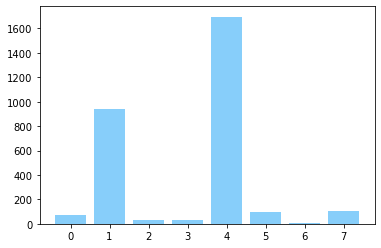

In [3]:
# example of chi squared feature selection
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
 # load the dataset as a pandas DataFrame
    data = read_csv(filename)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset(r'C:\\Users\\139665\\Downloads\\pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_, color='lightskyblue')
pyplot.show()

Now, in the above example we have done for a dataset where all the input variables are numerical. So below is an example of feature selection using SelecKBest() on a dataframe where there are categorical variables in the input. In such cases we have to do encoding before runing the algorithm. The dataset used below can be downloaded from the following link:<br>
https://github.com/datasets/breast-cancer/tree/master/data

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 0.776891
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.125944
Feature 8: 3.699989


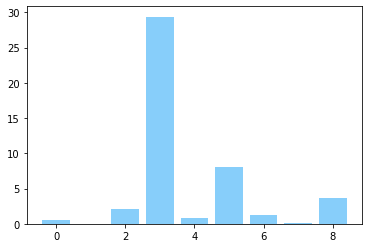

In [22]:
# example of chi squared feature selection for independent categorical data 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
 # load the dataset as a pandas DataFrame
    data = read_csv(filename)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, 1:-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('dataset/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_, color='lightskyblue')
pyplot.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Recursive Feature Elimination
RFE (Recursive feature elimination) feature selection technique **removes the attributes recursively and builds the model with remaining attributes**. We can implement RFE feature selection technique with the help of RFE class of scikit-learn Python library.<br><br>
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. <br>First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.<br><br>
In the example below, we will use RFE with logistic regression algorithm to select the best 3 attributes having the best features from Pima Indians Diabetes dataset to.<br>
Please download the dataset from the link below: <br>
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv


In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
dataframe = pd.read_csv(r'dataset/pima-indians-diabetes.csv')
array = dataframe.values

In [24]:
#Next, we will separate the array into its input and output components −
X = array[:,0:8]
Y = array[:,8]

In [25]:
#The following lines of code will select the best features from a dataset −
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Number of Features: 3")
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Number of Features: 3
Selected Features:  [ True False False False False  True  True False]
Feature Ranking:  [1 2 4 5 6 1 1 3]


In above output it can be seen, RFE choose Number of times pregnant, Body mass index and Diabetes pedigree function' as the first 3 best features. They are marked as 1 in the output.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Removing Highly Corelated Variables

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.
<br>For example, two variables which are linearly dependent (say, x and y which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v^2)

**How does correlation help in feature selection?**
<br>Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable(multicollinearity). So, when two features have high correlation, we can drop one of the two features<br>
We will be showing how it works using the data for breast cancer.<br> The link to download dataset:https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [26]:
df = pd.read_csv('dataset/cancer.csv')
df.drop(columns = 'Unnamed: 32', axis = 1, inplace = True)
df.shape

(569, 32)

(569, 31)


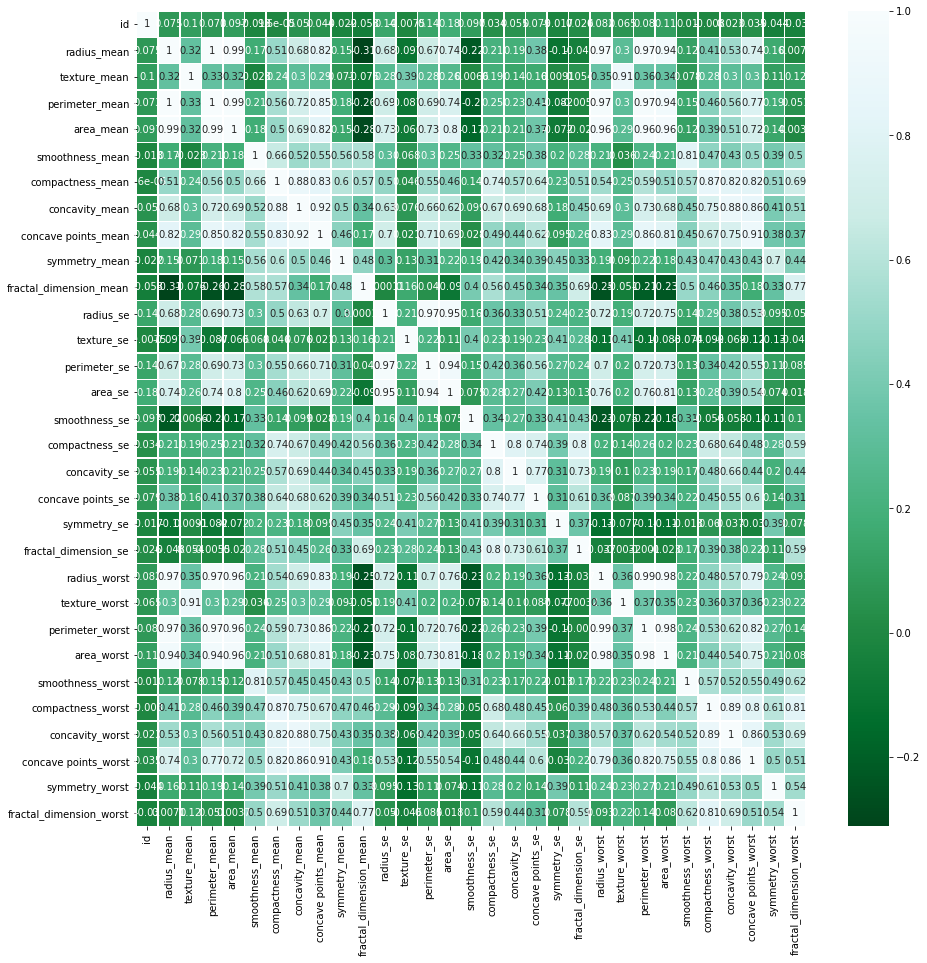

In [27]:
X = df.drop(columns = ['diagnosis'], axis = 1)
print(X.shape)
Y = df['diagnosis']
a = df.corr()
plt.rcParams['figure.figsize']=(15,15)
ax = sns.heatmap(a, linewidth=0.5, cmap= 'BuGn_r', annot = True)
plt.show()


In [28]:
columns = np.full((a.shape[0],), True, dtype=bool)
print(len(columns))
for i in range(a.shape[0]):
    for j in range(i+1, a.shape[0]):
        if a.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X = X[selected_columns]

31


In [29]:
# In can be seen from above initally contains 31 variable
# but after Removing highly correlated variables its shape changes to
X.shape

(569, 21)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Boruta
The Boruta algorithm is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in the data set with respect to an outcome variable.

**Methodology:**
1. First it creates randomness to the features by creating duplicate features and shuffle the values in each column. This features are called Shadow Features.
2. Trains a classifier (Random Forest) on the Dataset and calculate the importance using Mean Decrease Accuracy or Mean Decrease Impurity.
3. Then, the algorithm checks for each of your real features if they have higher importance. That is, whether the feature has a higher Z-score than the maximum Z-score of its shadow features than the best of the shadow features.
4. At every iteration, the algorithm compares the Z-scores of the shuffled copies of the features and the original features to see if the latter performed better than the former. If it does, the algorithm will mark the feature as important.

In [30]:
# !pip install boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [31]:
df.shape

(569, 32)

In [32]:
# Data Preprocessing 
SEED = 999
df = pd.read_csv('dataset/cancer.csv')
X, y = df.drop(['diagnosis','id','Unnamed: 32'], axis=1), df['diagnosis']      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


# Standardize data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)


# Feature Selection 
from boruta import BorutaPy

# Random Forests for Boruta 
rf_boruta = RandomForestClassifier(n_jobs=-1, random_state=SEED)
# Perform Boruta
boruta = BorutaPy(rf_boruta, n_estimators='auto', verbose=2)
boruta.fit(X_train.values, y_train.values.ravel())

# Select features 
cols = X_train.columns[boruta.support_]

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	20
Tentative: 	10
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	21
Tentative: 	7
Reject

In [33]:
# Number of columns before applying feature engineering technique: Boruta
print(len(df.columns))
# Number of cloumns after applying Boruta
print(len(cols))

33
22


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Variance Inflation Factor (VIF)

Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.

It is obtained by regressing each independent variable, say X on the remaining independent variables (say Y and Z) and checking how much of it (of X) is explained by these variables.


  **VIF = 1/(1- R^2)**

**Application & Interpretation:**<br>
1. From the list of variables, we select the variables with high VIF as collinear variables. But to decide which variable to select, we look at the Condition Index of the variables or the final regression coefficient table.
2. As a thumb rule, any variable with VIF > 2 is avoided in a regression analysis. Sometimes the condition is relaxed to 5, instead of 2.
3. It is not suitable for categorical variables

In [34]:
# same dataset is used as above
# Remove the target variable and other columns like say "id", "product_id" or unwanted vairable
df = df.drop(columns = ['id', 'diagnosis','Unnamed: 32'], axis = 1)
df.shape

(569, 30)

In [35]:
from sklearn.linear_model import LinearRegression
def Vif_cal(X):
    vif_check = X.copy()
    vif = []
    var = []
    for i in vif_check.columns:
        lr = LinearRegression()
        lr.fit(vif_check.drop([i],axis=1),vif_check[i])
        r2 = lr.score(vif_check.drop([i],axis=1),vif_check[i])
        vif.append(1/(1-r2))
        var.append(i)
    vif_df= pd.Series(vif, index=var)
    vif_df = pd.DataFrame({'variable':var,'vif':vif})
    vif_df.sort_values(by = 'vif', ascending=False,inplace=True)
    return(vif_df)
    return(vif)
    

In [36]:
Vif_cal(df).head()

,variable,vif
0,radius_mean,3806.115296
2,perimeter_mean,3786.400419
20,radius_worst,799.105946
22,perimeter_worst,405.023336
3,area_mean,347.878657


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Principal Component Analysis (PCA)
PCA, generally called **data reduction technique**, is very useful feature selection technique as it uses linear algebra to transform the dataset into a compressed form. We can implement PCA feature selection technique with the help of PCA class of scikit-learn Python library. We can select number of principal components in the output.

**The components are formed such that it explains the maximum variation in the dataset**.

In the example below, we will use PCA to select best 3 Principal components from Pima Indians Diabetes dataset.
PCA can be used were model interpritbilty is not concern. <br>Download link for diabetes dataset: https://www.kaggle.com/kumargh/pimaindiansdiabetescsv


In [37]:
from sklearn.decomposition import PCA
dataframe = pd.read_csv(r'dataset/pima-indians-diabetes.csv')
array = dataframe.values

In [38]:
#Next, we will separate array into input and output components −
X = array[:,0:8]
Y = array[:,8]

In [39]:
#The following lines of code will extract features from dataset −
pca = PCA(n_components = 3)
fit = pca.fit(X)
print("Explained Variance: ", fit.explained_variance_ratio_)
print(fit.components_)
print(fit.n_features_)
print(fit.explained_variance_)

Explained Variance:  [0.88854663 0.06159078 0.02579012]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]
8
[13456.57298102   932.76013231   390.57783115]


PCA does not reak pick features foe further modeling, it reduces large numer of features to the number of components we want. <br>
PCA does not provide much interpretability

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Linear Discriminant Analysis (LDA)
LDA is a type of Linear combination, a mathematical process using various data items and applying a function to that site to separately analyze multiple classes of objects or items.



**In case of LDA, the transform method takes two parameters: the X_train and the y_train. However in the case of PCA, the transform method only requires one parameter i.e. X_train**. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.

We have shown an example of LDA below:

In [40]:
dataframe = pd.read_csv(r'dataset/pima-indians-diabetes.csv')
array = dataframe.values

In [41]:
#Next, we will separate array into input and output components −
X = array[:,0:8]
Y = array[:,8]


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
X_test.shape

(154, 1)

• Here it can be seen that one components are passed, it is because LDA takes into consideration the number of classes in the dependent variables(output class labels), ie, the number of categories in y_train. <br>
• In the dataset the dependent is 'Class' which has either value '1', meaning a person has diabetes or '0' when the person does not have diabetes.<br> 
• For our description of LDA, the k−1 dimensions we keep would be the in-model space, whereas the remaining dimensions are the out-of-model space, k being the number of output class labels.<br>
• A visualization for how PCA and LDA works is given below:

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


Principal Component Analysis (**PCA**) applied to this data **identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance** in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (**LDA**) tries to **identify attributes that
account for the most variance** between classes. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour
and Virginica) with 4 attributes: sepal length, sepal width, petal length
and petal width.



Automatically created module for IPython interactive environment
target names: ['setosa' 'versicolor' 'virginica']
explained variance ratio (first two components): [0.92461872 0.05306648]


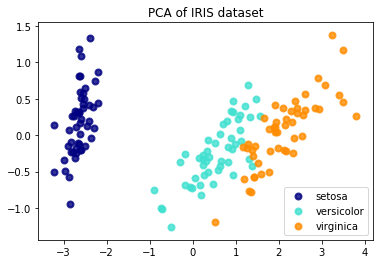

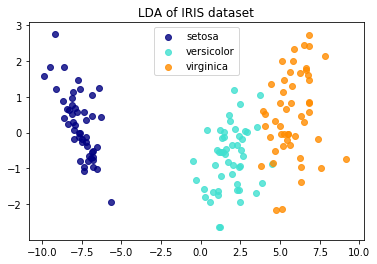

In [45]:
print(__doc__)

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
# print(X)
# print(y)
print("target names:" , target_names)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Feature Importance using RF
It uses a **trained supervised classifier to select features**. We can implement this feature selection technique with the help of any tree based classifier of scikit-learn Python library.<br>
It is a widely used method for feature selection. <br>

In the example below, RandomForestClassifier is used to select features from Pima Indians Diabetes dataset.

Feature 0: 0.079879
Feature 1: 0.234760
Feature 2: 0.103441
Feature 3: 0.067670
Feature 4: 0.077548
Feature 5: 0.176165
Feature 6: 0.133996
Feature 7: 0.126542


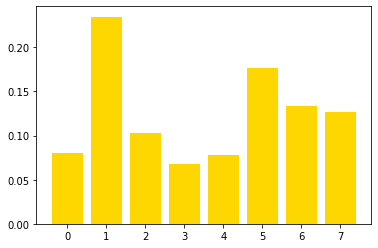

In [46]:
#Feature importance using Randomforest Classifier (independent-numerical, target-categorical)
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
 # load the dataset as a pandas DataFrame
    data = read_csv(filename)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = RandomForestClassifier()
    fs.fit(X_train, y_train)
    X_train_fs = fs.apply(X_train)
    X_test_fs = fs.apply(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset(r'dataset/pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are feature importances for the features
for i in range(len(fs.feature_importances_)):
    print('Feature %d: %f' % (i, fs.feature_importances_[i]))
# plot the feature importance
pyplot.bar([i for i in range(len(fs.feature_importances_))], fs.feature_importances_, color='gold')
pyplot.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Modeling" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 
